In [1]:
# Data manipulation imports
import pandas as pd
import numpy as np

# Graphing imports
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Groningen_Econ_Data.csv')
df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I am most interested in comparing how population (pop), work force size (emp), average annual hours worked per capita (avh), human capital index which is a reflection of education level (hc)currency (currency_unit), and real gdp (rgdpna) vary by country (country) and over time (year) between 1950 and 2019:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12880 entries, 0 to 12879
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    12880 non-null  object 
 1   country        12880 non-null  object 
 2   currency_unit  12880 non-null  object 
 3   year           12880 non-null  int64  
 4   rgdpe          10469 non-null  float64
 5   rgdpo          10469 non-null  float64
 6   pop            10469 non-null  float64
 7   emp            9599 non-null   float64
 8   avh            3562 non-null   float64
 9   hc             8707 non-null   float64
 10  ccon           10469 non-null  float64
 11  cda            10469 non-null  float64
 12  cgdpe          10469 non-null  float64
 13  cgdpo          10465 non-null  float64
 14  cn             10384 non-null  float64
 15  ck             7165 non-null   float64
 16  ctfp           6482 non-null   float64
 17  cwtfp          6482 non-null   float64
 18  rgdpna

# Investigation - general comparison:

In [4]:
# Create a smaller dataset with the columns that I am interested in investigating
df_tight = df [['country', 'currency_unit', 'year', 'pop', 'emp', 'avh', 'hc', 'rgdpna']]
df_tight.head()

,country,currency_unit,year,pop,emp,avh,hc,rgdpna
0,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN
1,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN
2,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN
3,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN
4,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN


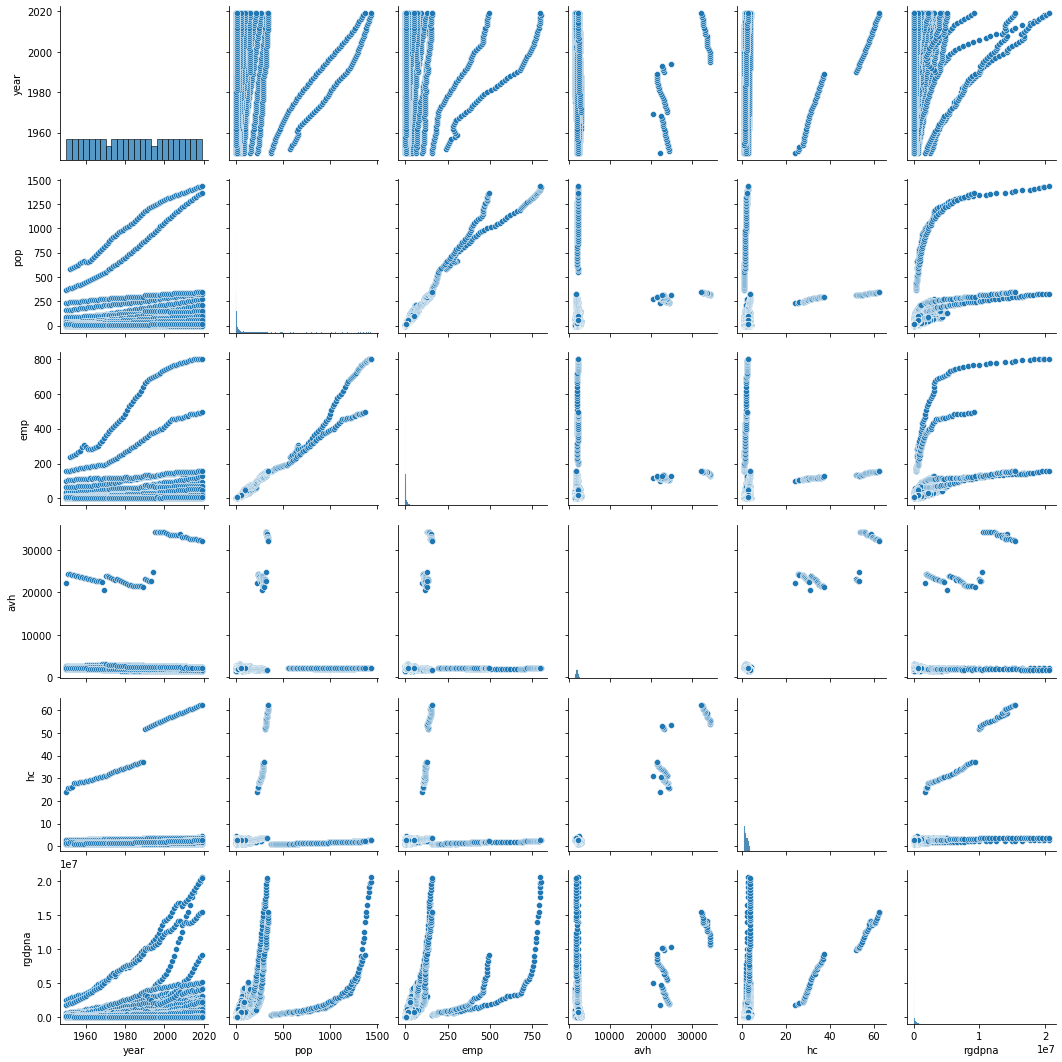

In [5]:
sns.pairplot(df_tight);

These are very interesting plots - real GDP tends to increase exponentially against everything and population and work force participation are pretty linear.

I'm curious abour which countries have that massive increase in human capital over time, which countries have the decrease in average hours worked over time, and which two countries had the massive work force particpation increase over time (China and India?).

I created Europe data in Excel by adding all the countries on the Euro together - Austria, Belgium, Cyprus, Germany, Spain, Estonia, Finland, France, Greece, Ireland, Italy, Lithuania, Luxembourg, Latvia, Malta, Montenegro, Netherlands, Portugal, Slovakia, and Slovenia so these are the countries that are included in the Europe outputs. Below I will make the same list for ease of comparison with the US between the other major economies of the world:

In [6]:
countries = ['Austria', 'Belgium', 'Canada', 'Czech Republic', 'Cyprus', 'Germany', 'Spain', 'Estonia', 'Finland', 'France',
             'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Luxembourg', 'Latvia',
             'Malta', 'Montenegro', 'Netherlands', 'Portugal', 'Republic of Korea', 'Saudi Arabia','Singapore', 'Slovakia',
             'Slovenia', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']

In [7]:
df_countries = df_tight.loc[df_tight['country'].isin(countries)].reset_index(drop=True)
df_countries.head()

,country,currency_unit,year,pop,emp,avh,hc,rgdpna
0,United Arab Emirates,UAE Dirham,1950,NaN,NaN,NaN,NaN,NaN
1,United Arab Emirates,UAE Dirham,1951,NaN,NaN,NaN,NaN,NaN
2,United Arab Emirates,UAE Dirham,1952,NaN,NaN,NaN,NaN,NaN
3,United Arab Emirates,UAE Dirham,1953,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,UAE Dirham,1954,NaN,NaN,NaN,NaN,NaN


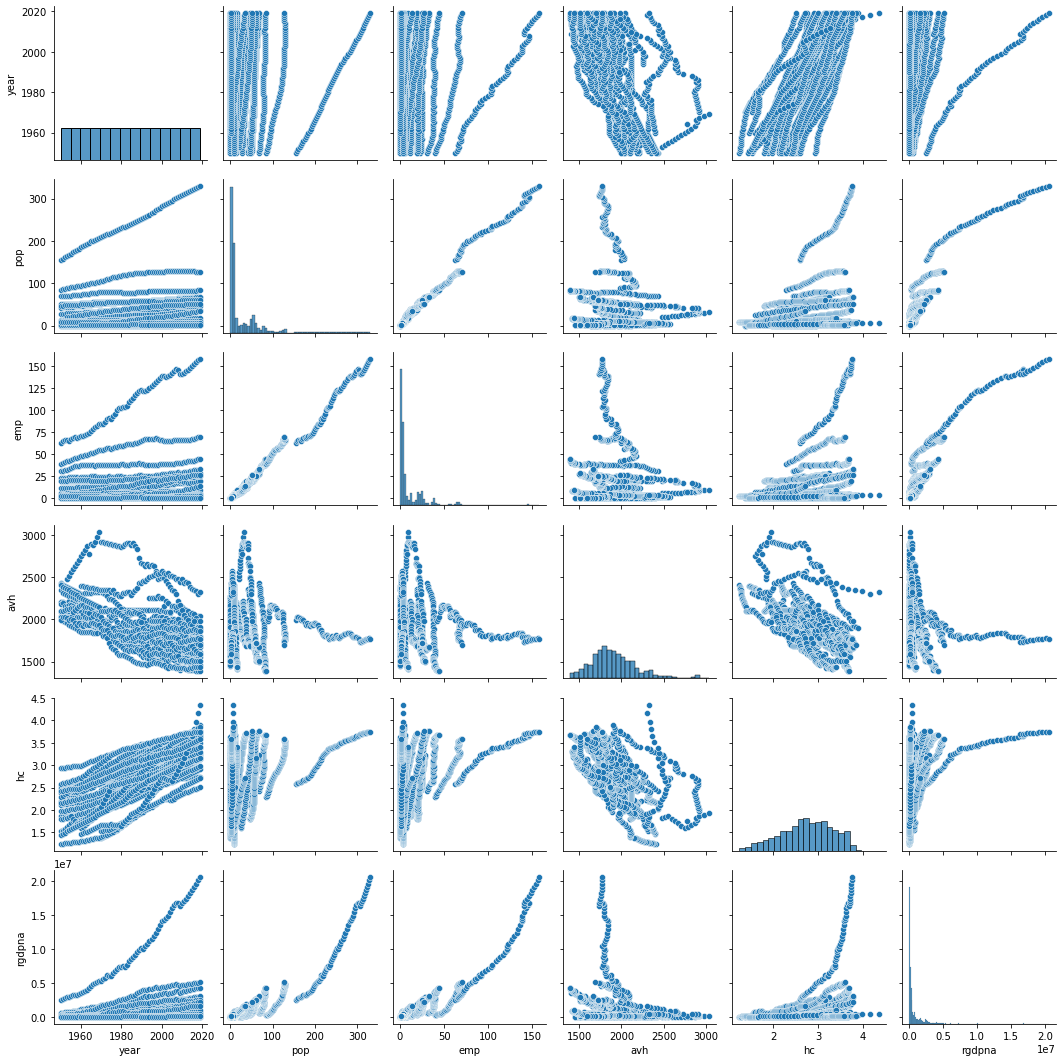

In [8]:
sns.pairplot(df_countries);

# Investigation - 2019 comparison:
For the comparisons below which are between the major world economies I will just look at 2019 data:

In [9]:
df_two_thousand_nineteen = df_tight.loc[(df_tight['country'].isin(countries)) & (df_tight['year'] == 2019)].reset_index(drop = True)
df_two_thousand_nineteen.head()

,country,currency_unit,year,pop,emp,avh,hc,rgdpna
0,United Arab Emirates,UAE Dirham,2019,9.770529,5.808834,NaN,2.746695,6.479862e+05
1,Austria,Euro,2019,8.955102,4.550281,1611.374223,3.381046,4.767233e+05
2,Belgium,Euro,2019,11.539328,4.921937,1586.430997,3.149034,5.341023e+05
3,Canada,Canadian Dollar,2019,37.411047,19.298662,1689.280933,3.721066,1.874187e+06
4,Switzerland,Swiss Franc,2019,8.591365,5.011205,1556.882844,3.702678,6.482572e+05


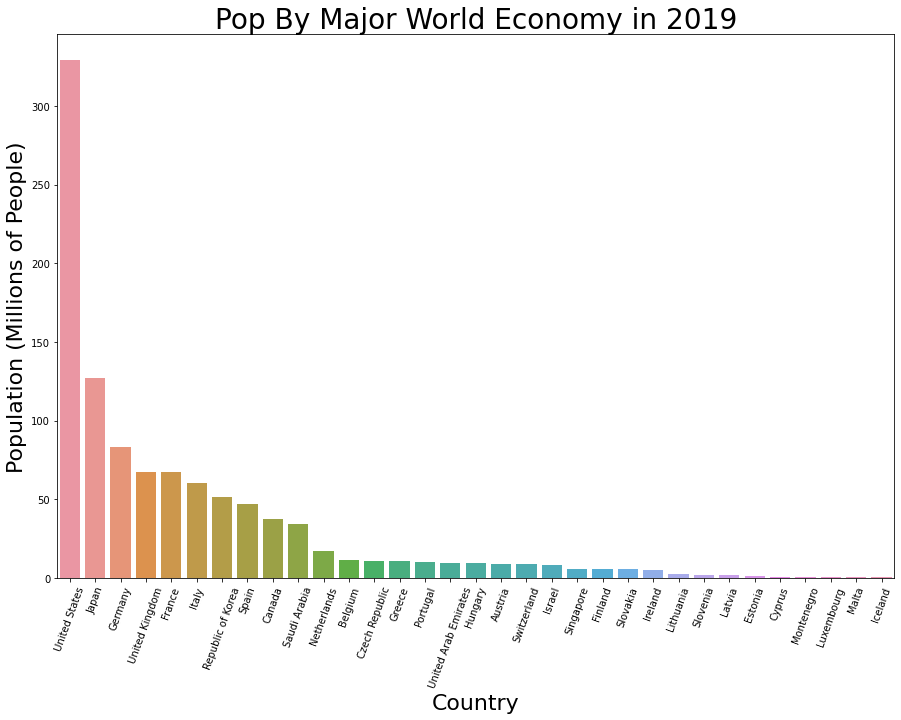

In [10]:
plt.figure(figsize = (15, 10))

sns.barplot(data = df_two_thousand_nineteen, x = 'country', y = 'pop', order =
            df_two_thousand_nineteen.sort_values('pop', ascending = False).country)
plt.xticks(rotation = 70)

plt.title('Pop By Major World Economy in 2019', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Population (Millions of People)', size = 22)

plt.show()

This is surprising, I would have expected the US to be much higher compared to most European countries

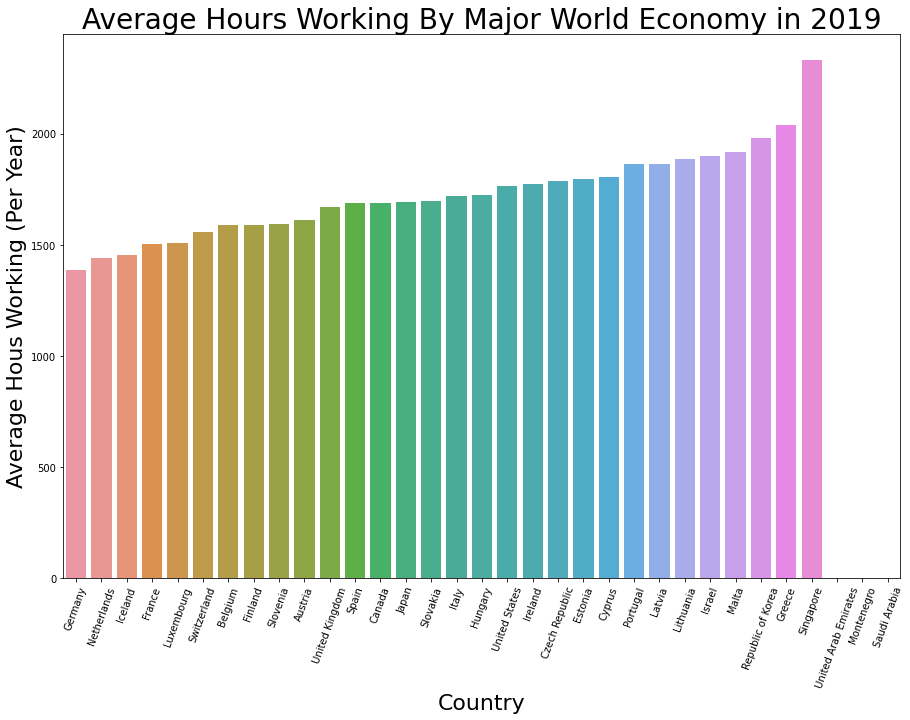

In [11]:
plt.figure(figsize = (15, 10))

sns.barplot(data = df_two_thousand_nineteen, x = 'country', y = 'avh', order = 
            df_two_thousand_nineteen.sort_values('avh').country)

plt.xticks(rotation = 70)

plt.title('Average Hours Working By Major World Economy in 2019', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Average Hous Working (Per Year)', size = 22)

plt.show()

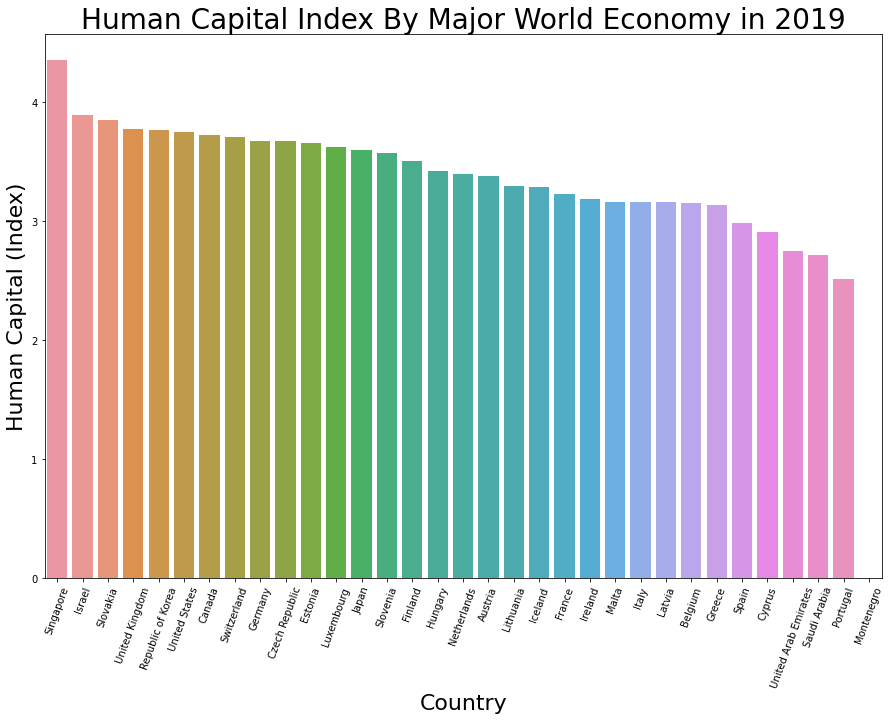

In [12]:
plt.figure(figsize = (15, 10))

sns.barplot(data = df_two_thousand_nineteen, x = 'country', y = 'hc', order =
            df_two_thousand_nineteen.sort_values('hc', ascending = False).country)
plt.xticks(rotation = 70)

plt.title('Human Capital Index By Major World Economy in 2019', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Human Capital (Index)', size = 22)

plt.show()

Sorted tables to see the same comparison data (2019) and add per capita for emp and gdp:

In [13]:
#do the same for the split dfs
df_two_thousand_nineteen['emp_pc'] = df_two_thousand_nineteen['emp']/df_two_thousand_nineteen['pop']
df_two_thousand_nineteen['rgdpna_pc'] = df_two_thousand_nineteen['rgdpna']/df_two_thousand_nineteen['pop']

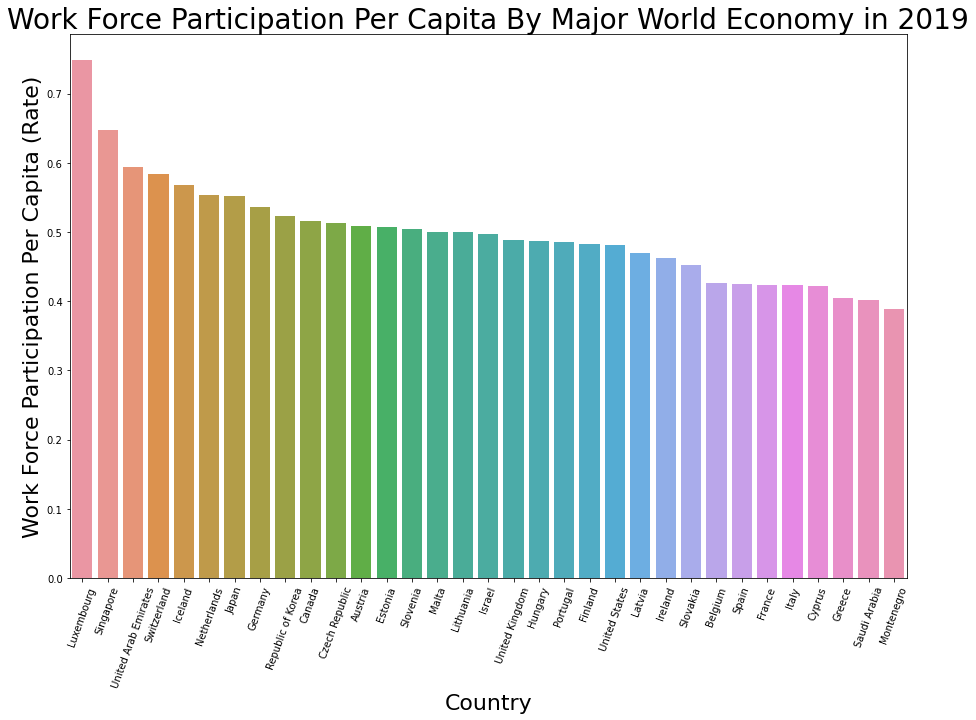

In [14]:
plt.figure(figsize = (15, 10))

sns.barplot(data = df_two_thousand_nineteen, x = 'country', y = 'emp_pc', order =
            df_two_thousand_nineteen.sort_values('emp_pc', ascending = False).country)
plt.xticks(rotation = 70)

plt.title('Work Force Participation Per Capita By Major World Economy in 2019', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Work Force Participation Per Capita (Rate)', size = 22)

plt.show()

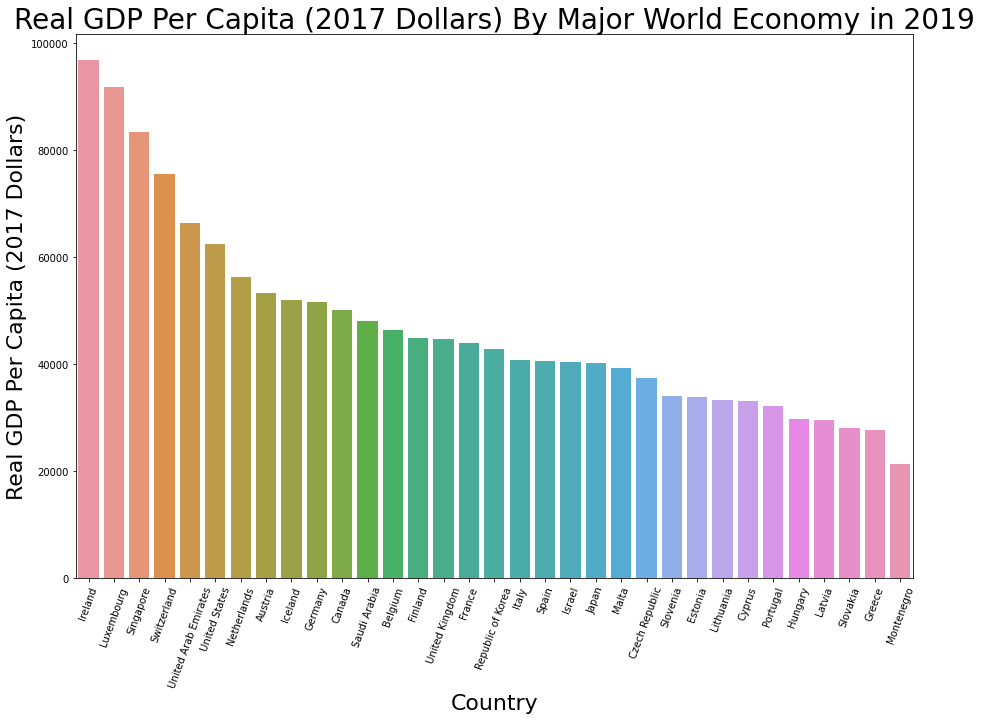

In [15]:
plt.figure(figsize = (15, 10))

sns.barplot(data = df_two_thousand_nineteen, x = 'country', y = 'rgdpna_pc', order =
            df_two_thousand_nineteen.sort_values('rgdpna_pc', ascending = False).country)
plt.xticks(rotation = 70)

plt.title('Real GDP Per Capita (2017 Dollars) By Major World Economy in 2019', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Real GDP Per Capita (2017 Dollars)', size = 22)

plt.show()

In [16]:
df_two_thousand_nineteen[['country', 'pop']].sort_values(by = ['pop'], ascending = False).reset_index(drop = True)

,country,pop
0,United States,329.064917
1,Japan,126.860301
2,Germany,83.517045
3,United Kingdom,67.530172
4,France,67.351247
5,Italy,60.550075
6,Republic of Korea,51.225308
7,Spain,46.736776
8,Canada,37.411047
9,Saudi Arabia,34.268528


In [17]:
df_two_thousand_nineteen[['country', 'emp_pc']].sort_values(by = ['emp_pc'], ascending = False).reset_index(drop = True)

,country,emp_pc
0,Luxembourg,0.748158
1,Singapore,0.647723
2,United Arab Emirates,0.594526
3,Switzerland,0.583284
4,Iceland,0.567317
5,Netherlands,0.553128
6,Japan,0.551604
7,Germany,0.536360
8,Republic of Korea,0.523150
9,Canada,0.515855


In [18]:
df_two_thousand_nineteen[['country', 'hc']].sort_values(by = ['hc'], ascending = False).reset_index(drop = True)

,country,hc
0,Singapore,4.351568
1,Israel,3.891540
2,Slovakia,3.849036
3,United Kingdom,3.773596
4,Republic of Korea,3.765123
5,United States,3.749341
6,Canada,3.721066
7,Switzerland,3.702678
8,Germany,3.675378
9,Czech Republic,3.674304


In [19]:
df_two_thousand_nineteen[['country', 'avh']].sort_values(by = ['avh']).reset_index(drop = True)

,country,avh
0,Germany,1386.196834
1,Netherlands,1439.731516
2,Iceland,1454.494825
3,France,1504.912353
4,Luxembourg,1505.558542
5,Switzerland,1556.882844
6,Belgium,1586.430997
7,Finland,1590.694538
8,Slovenia,1592.933904
9,Austria,1611.374223


In [20]:
df_two_thousand_nineteen[['country', 'rgdpna_pc']].sort_values(by = ['rgdpna_pc'], ascending = False).reset_index(drop = True)

,country,rgdpna_pc
0,Ireland,96812.317534
1,Luxembourg,91864.899672
2,Singapore,83454.821162
3,Switzerland,75454.511594
4,United Arab Emirates,66320.487867
5,United States,62490.988670
6,Netherlands,56194.862822
7,Austria,53234.827755
8,Iceland,52016.952373
9,Germany,51654.934630


# Investigation - time series

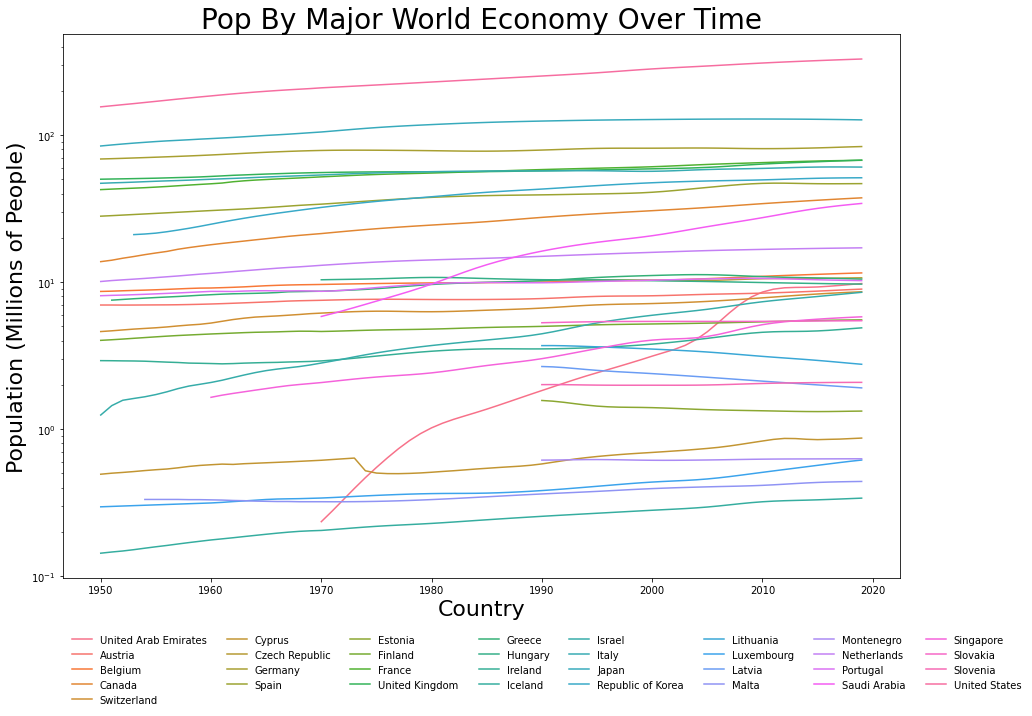

In [21]:
plt.figure(figsize = (15, 10))

sns.lineplot(data = df_countries, x = 'year', y = 'pop', hue = 'country')
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Pop By Major World Economy Over Time', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Population (Millions of People)', size = 22);

To find the fastest growing countries I will split the plot into two to make it easier to read by splitting the lines plots into countries on the euro and countries which are not:

In [22]:
euro_countries = ['Austria', 'Belgium', 'Cyprus', 'Germany', 'Spain', 'Estonia', 'Finland', 'France',
             'Greece', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia',
             'Malta', 'Montenegro', 'Netherlands', 'Portugal', 'Slovakia']
                  
other_countries = ['Canada', 'Czech Republic', 'Hungary', 'Iceland', 'Israel', 'Japan', 'Republic of Korea', 'Saudi Arabia','Singapore',
             'Slovenia', 'Switzerland', 'United Arab Emirates','United Kingdom', 'United States']

In [23]:
df_pop_countries_euro = df_tight.loc[(df_tight['country'].isin(euro_countries))].reset_index(drop = True)
df_pop_countries_euro.head()

,country,currency_unit,year,pop,emp,avh,hc,rgdpna
0,Austria,Euro,1950,6.980751,2.934920,2085.669553,2.552640,56946.14844
1,Austria,Euro,1951,6.981105,2.990606,2083.015656,2.537036,60474.61328
2,Austria,Euro,1952,6.973375,2.923522,2080.365137,2.521527,60239.30078
3,Austria,Euro,1953,6.978117,2.891932,2077.717989,2.506113,62218.33203
4,Austria,Euro,1954,6.985894,2.976328,2075.074211,2.490793,67352.93750


In [24]:
df_pop_countries_other = df_tight.loc[(df_tight['country'].isin(other_countries))].reset_index(drop = True)
df_pop_countries_other.head()

,country,currency_unit,year,pop,emp,avh,hc,rgdpna
0,United Arab Emirates,UAE Dirham,1950,NaN,NaN,NaN,NaN,NaN
1,United Arab Emirates,UAE Dirham,1951,NaN,NaN,NaN,NaN,NaN
2,United Arab Emirates,UAE Dirham,1952,NaN,NaN,NaN,NaN,NaN
3,United Arab Emirates,UAE Dirham,1953,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,UAE Dirham,1954,NaN,NaN,NaN,NaN,NaN


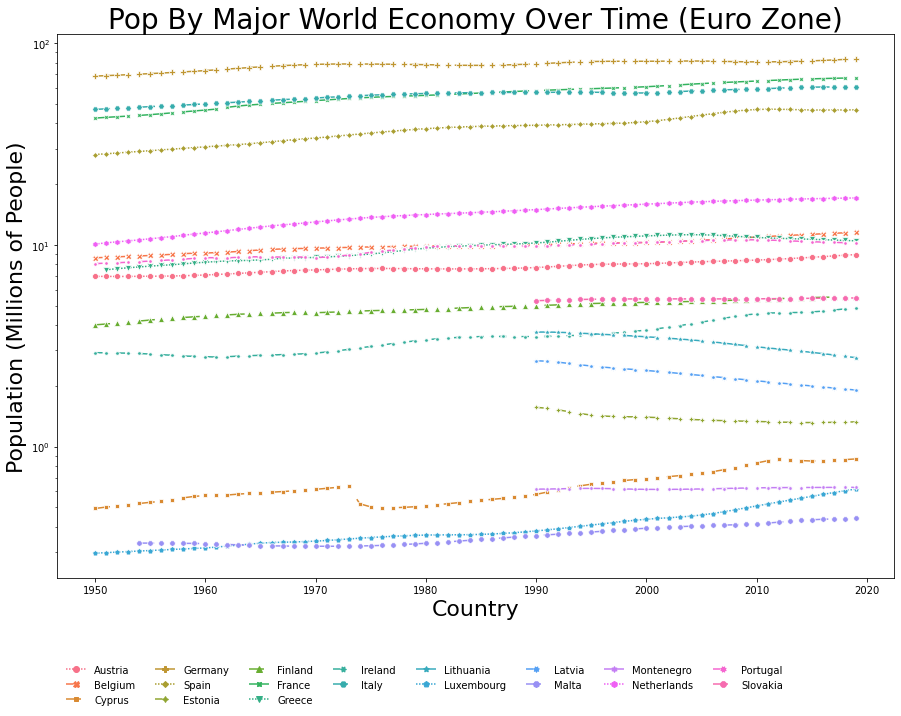

In [25]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_euro, x = 'year', y = 'pop', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Pop By Major World Economy Over Time (Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Population (Millions of People)', size = 22);

Europeab coutries look like a pretty slow and steady ascent except for in Cypress during the 1970s (Turkish Invasion)

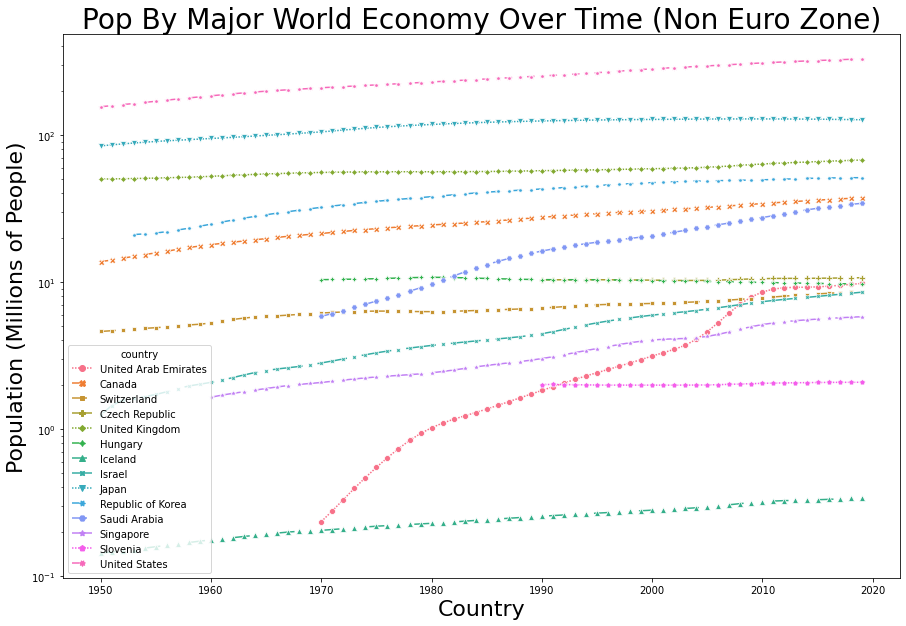

In [26]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_other, x = 'year', y = 'pop', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10)])
plt.yscale('log')

plt.title('Pop By Major World Economy Over Time (Non Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Population (Millions of People)', size = 22);

The UAE and Saudi Arabia look like the fastest growing countries with notable mentions to Iceland and Israel although much smaller countries

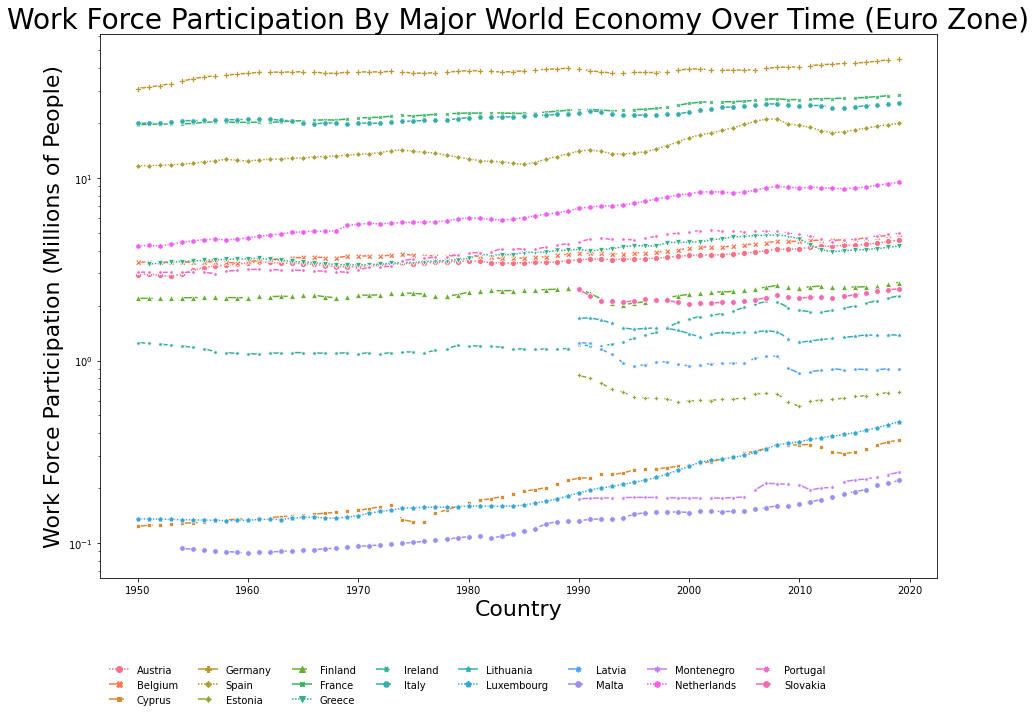

In [27]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_euro, x = 'year', y = 'emp', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Work Force Participation By Major World Economy Over Time (Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Work Force Participation (Millions of People)', size = 22);

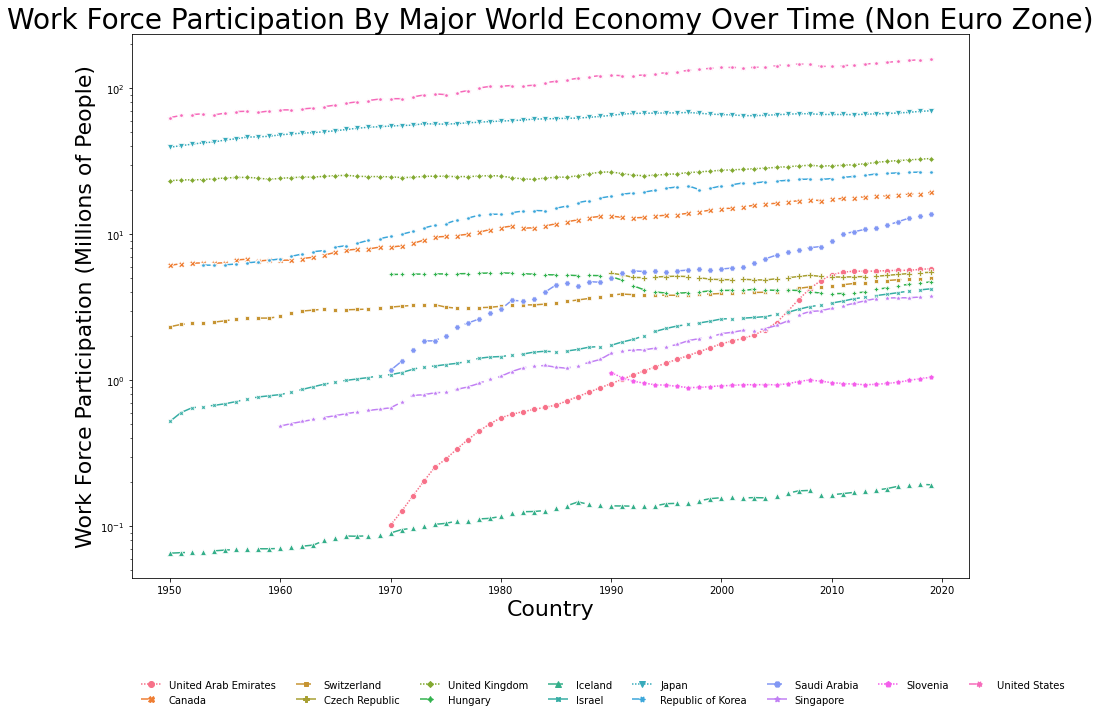

In [28]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_other, x = 'year', y = 'emp', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Work Force Participation By Major World Economy Over Time (Non Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Work Force Participation (Millions of People)', size = 22);

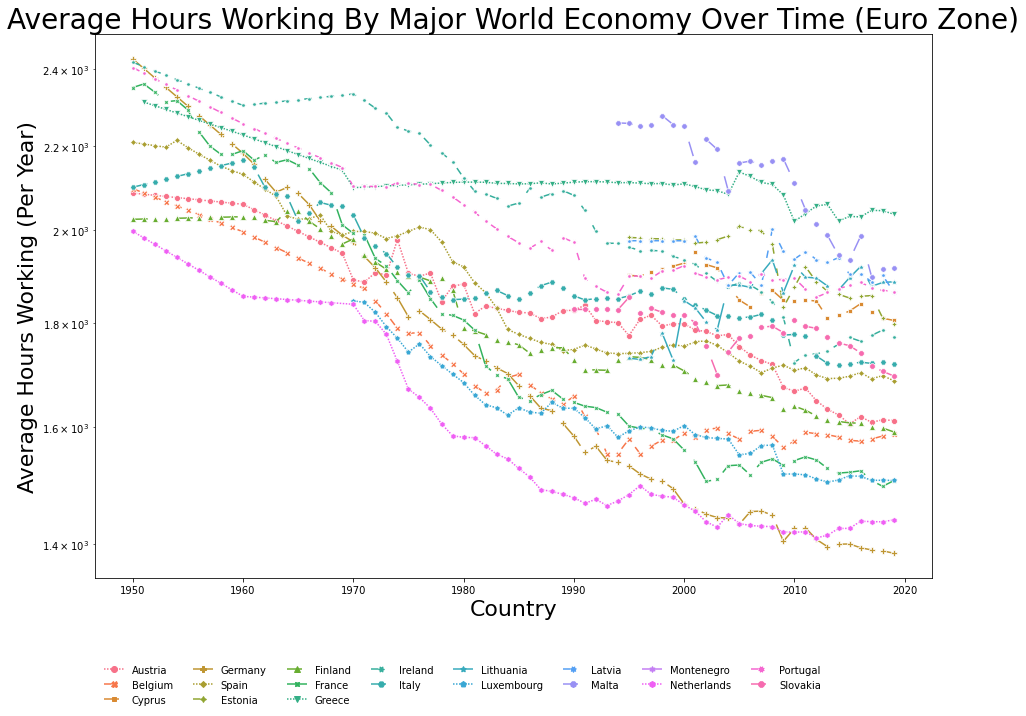

In [29]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_euro, x = 'year', y = 'avh', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Average Hours Working By Major World Economy Over Time (Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Average Hours Working (Per Year)', size = 22);

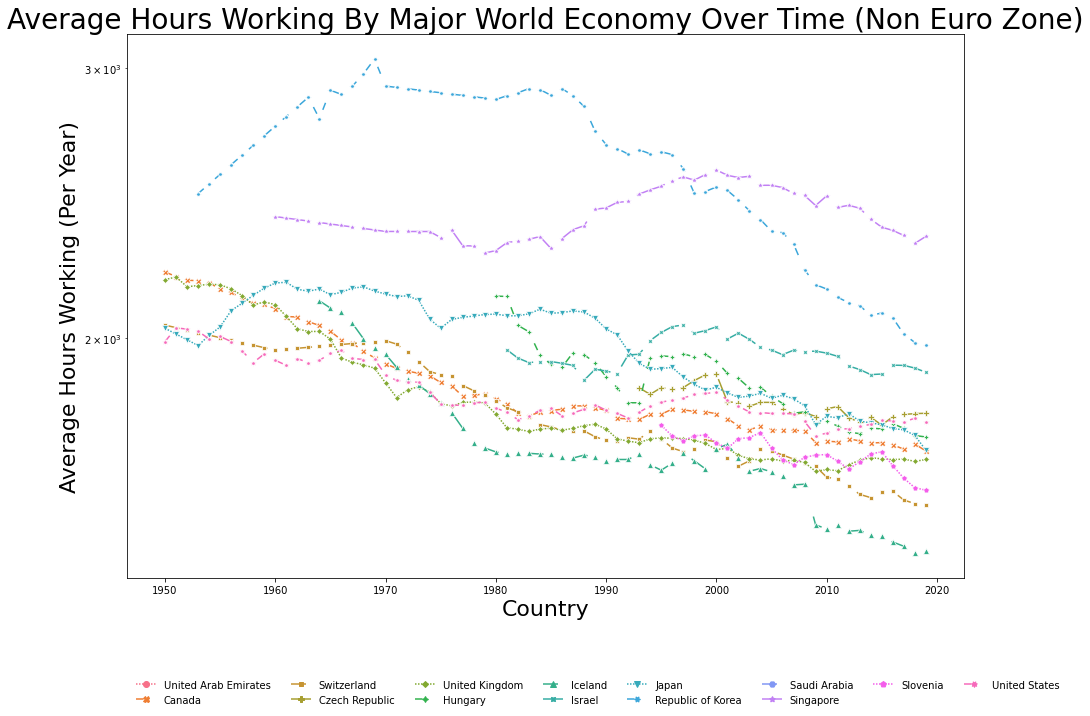

In [30]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_other, x = 'year', y = 'avh', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Average Hours Working By Major World Economy Over Time (Non Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Average Hours Working (Per Year)', size = 22);

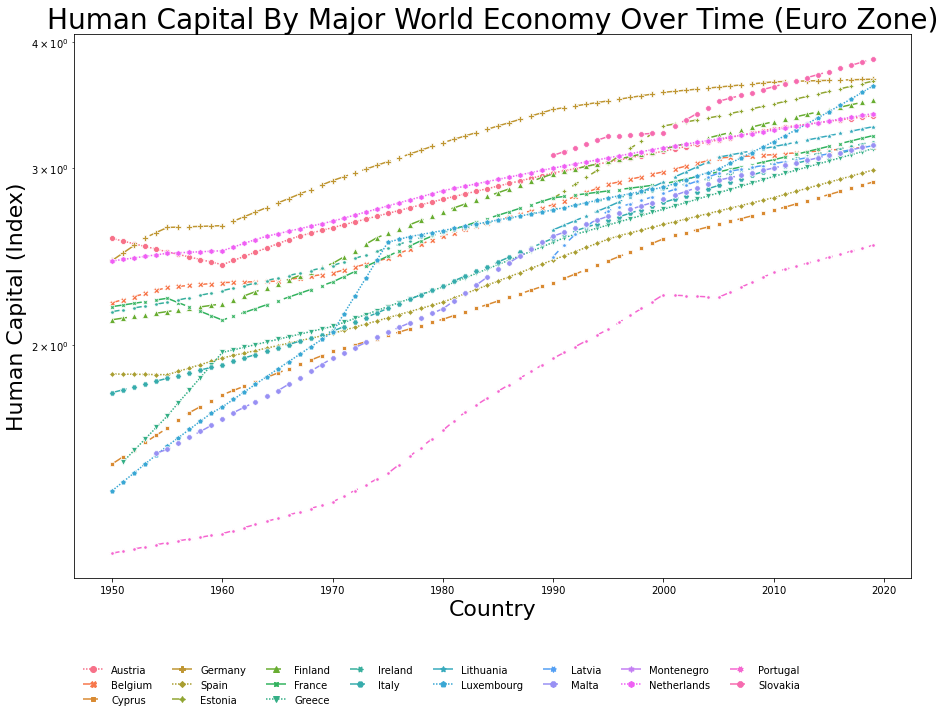

In [31]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_euro, x = 'year', y = 'hc', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Human Capital By Major World Economy Over Time (Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Human Capital (Index)', size = 22);

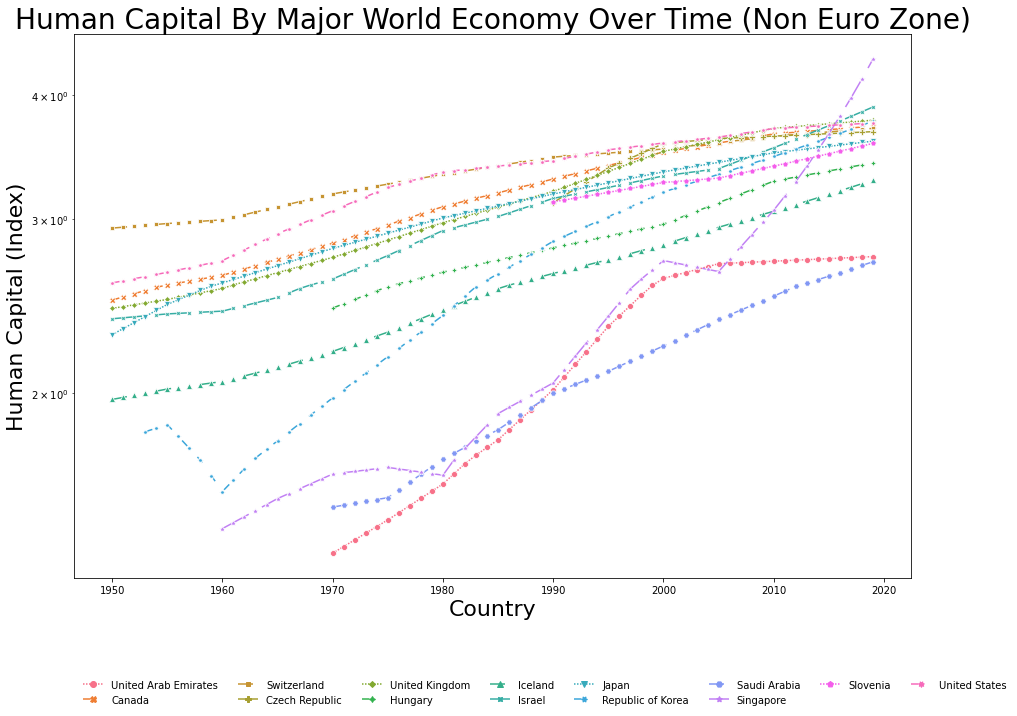

In [32]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_other, x = 'year', y = 'hc', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Human Capital By Major World Economy Over Time (Non Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Human Capital (Index)', size = 22);

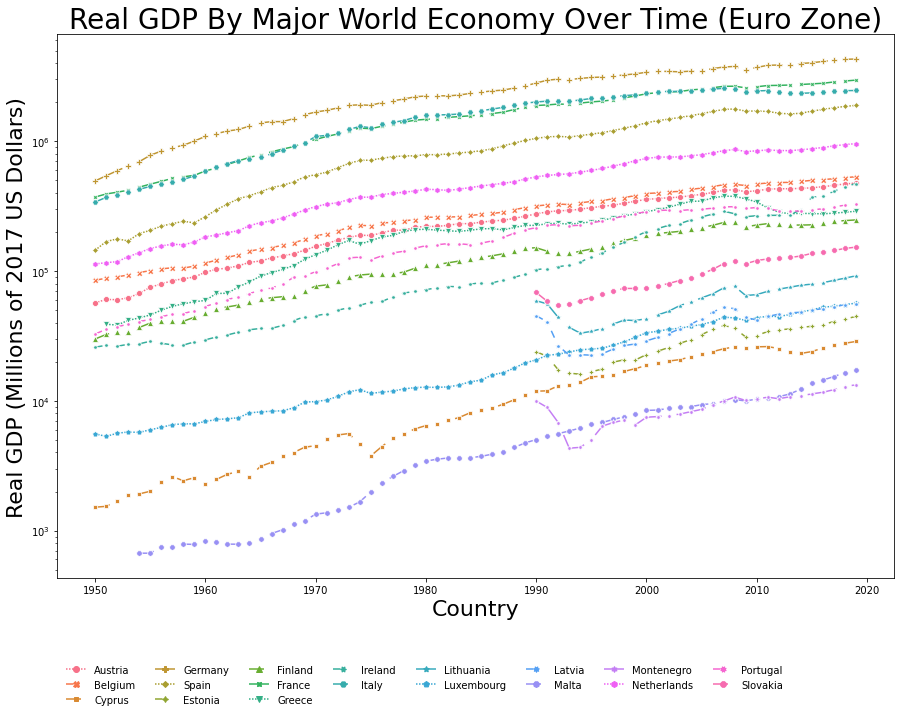

In [33]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_euro, x = 'year', y = 'rgdpna', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Real GDP By Major World Economy Over Time (Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Real GDP (Millions of 2017 US Dollars)', size = 22);

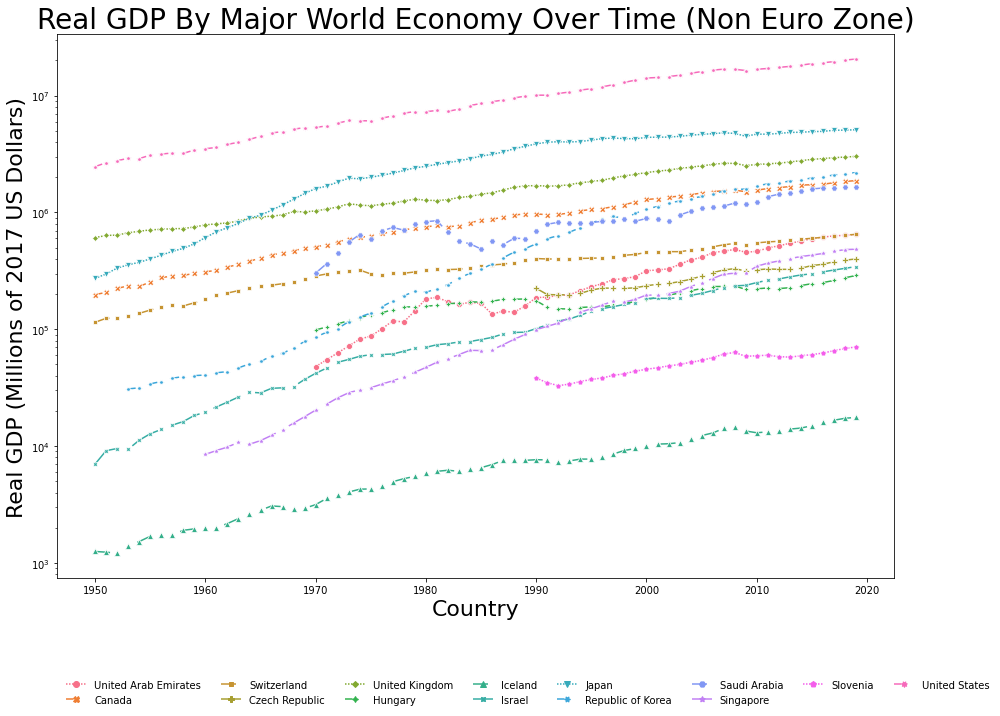

In [34]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_other, x = 'year', y = 'rgdpna', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Real GDP By Major World Economy Over Time (Non Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Real GDP (Millions of 2017 US Dollars)', size = 22);

In [35]:
df_countries.head()

,country,currency_unit,year,pop,emp,avh,hc,rgdpna
0,United Arab Emirates,UAE Dirham,1950,NaN,NaN,NaN,NaN,NaN
1,United Arab Emirates,UAE Dirham,1951,NaN,NaN,NaN,NaN,NaN
2,United Arab Emirates,UAE Dirham,1952,NaN,NaN,NaN,NaN,NaN
3,United Arab Emirates,UAE Dirham,1953,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,UAE Dirham,1954,NaN,NaN,NaN,NaN,NaN


Create a Work Force Participation and GDP per capita columns for more fair comparison: 

In [36]:
df_countries['emp_pc'] = df_countries['emp']/df_countries['pop']
df_countries.head()

,country,currency_unit,year,pop,emp,avh,hc,rgdpna,emp_pc
0,United Arab Emirates,UAE Dirham,1950,NaN,NaN,NaN,NaN,NaN,NaN
1,United Arab Emirates,UAE Dirham,1951,NaN,NaN,NaN,NaN,NaN,NaN
2,United Arab Emirates,UAE Dirham,1952,NaN,NaN,NaN,NaN,NaN,NaN
3,United Arab Emirates,UAE Dirham,1953,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,UAE Dirham,1954,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_countries['rgdpna_pc'] = df_countries['rgdpna']/df_countries['pop']
df_countries.head()

,country,currency_unit,year,pop,emp,avh,hc,rgdpna,emp_pc,rgdpna_pc
0,United Arab Emirates,UAE Dirham,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United Arab Emirates,UAE Dirham,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Arab Emirates,UAE Dirham,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Arab Emirates,UAE Dirham,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,UAE Dirham,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#do the same for the split dfs
df_pop_countries_euro['emp_pc'] = df_pop_countries_euro['emp']/df_pop_countries_euro['pop']
df_pop_countries_other['emp_pc'] = df_pop_countries_other['emp']/df_pop_countries_other['pop']

df_pop_countries_euro['rgdpna_pc'] = df_pop_countries_euro['rgdpna']/df_pop_countries_euro['pop']
df_pop_countries_other['rgdpna_pc'] = df_pop_countries_other['rgdpna']/df_pop_countries_other['pop']

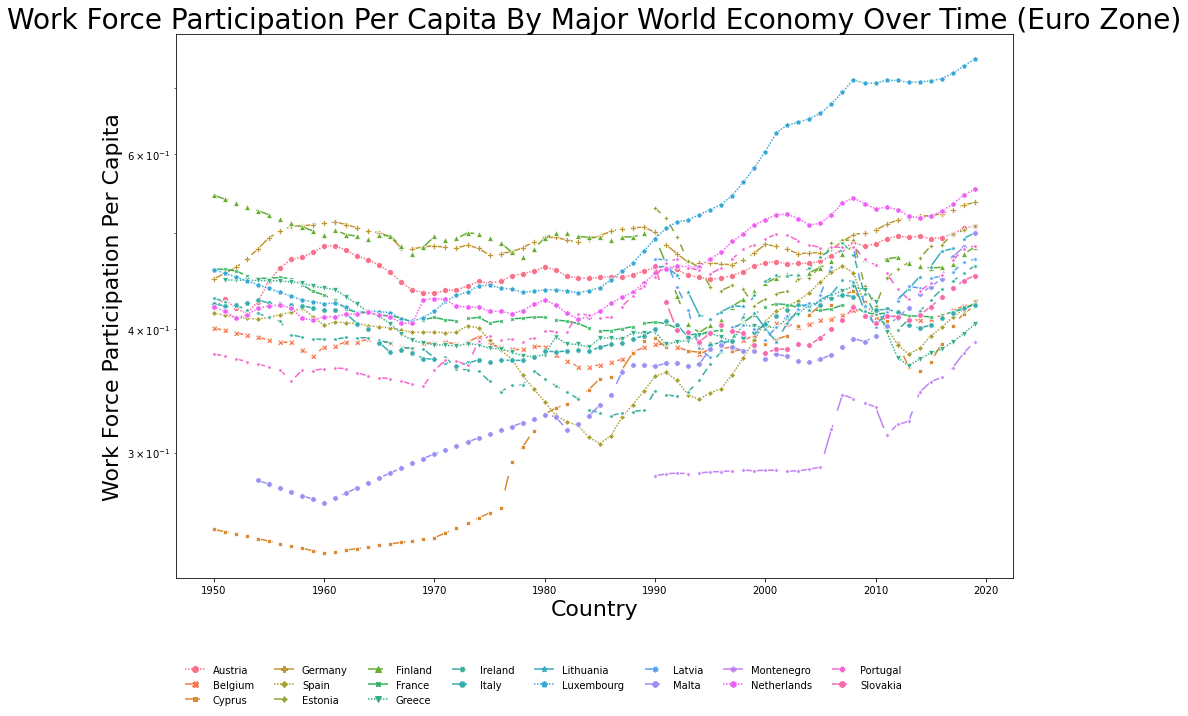

In [39]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_euro, x = 'year', y = 'emp_pc', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Work Force Participation Per Capita By Major World Economy Over Time (Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Work Force Participation Per Capita', size = 22);

Lux, Montenegro, Cyprus (again, because of the invasion), and Malta!

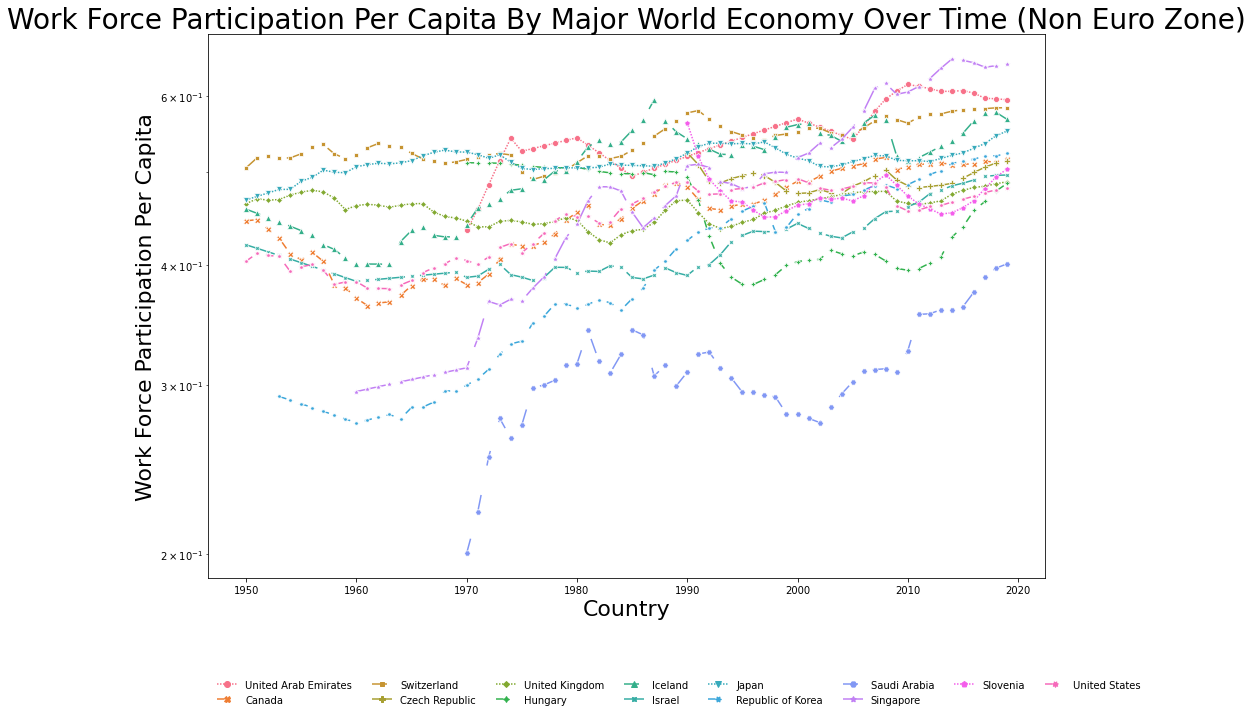

In [40]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_other, x = 'year', y = 'emp_pc', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Work Force Participation Per Capita By Major World Economy Over Time (Non Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Work Force Participation Per Capita', size = 22);

Saudi Arabia, South Korea, and Singapore!

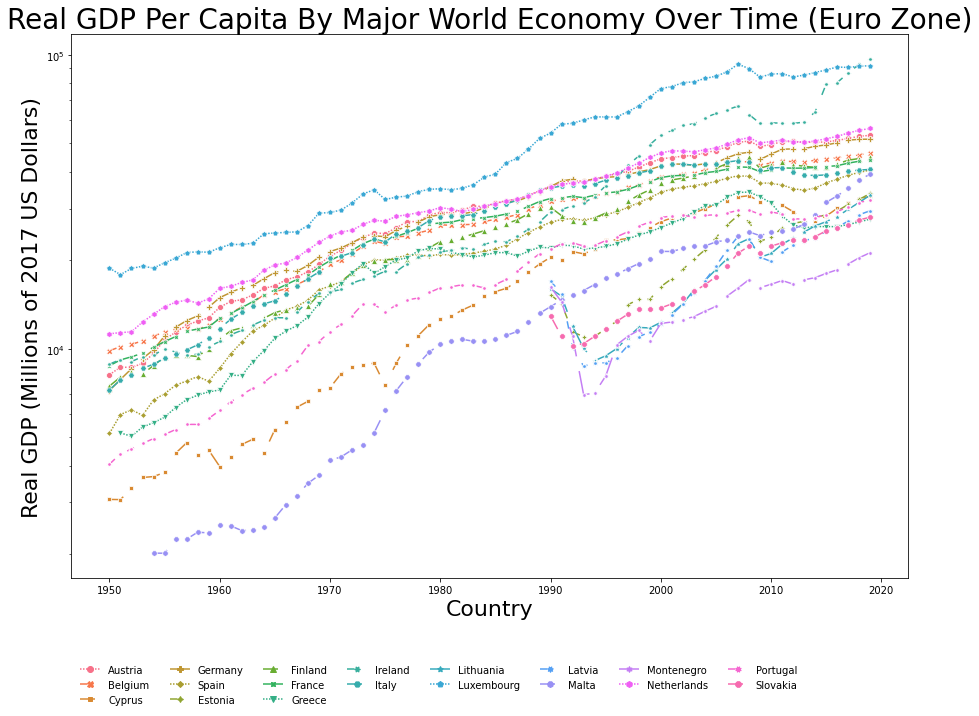

In [41]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_euro, x = 'year', y = 'rgdpna_pc', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 8)

plt.title('Real GDP Per Capita By Major World Economy Over Time (Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Real GDP (Millions of 2017 US Dollars)', size = 22);

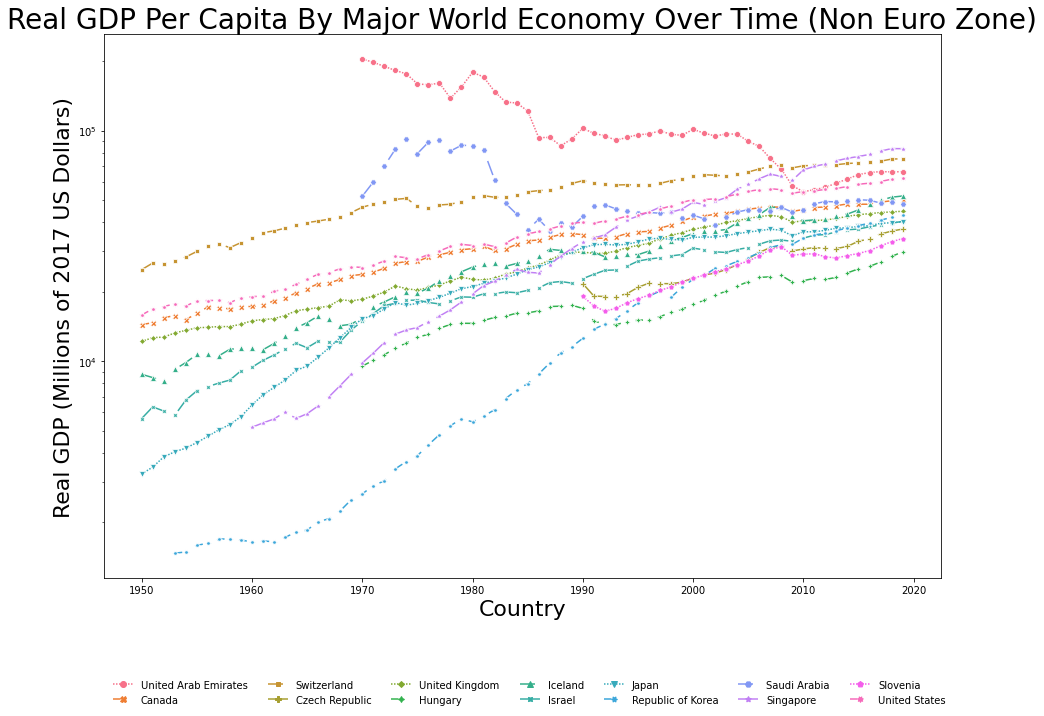

In [42]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df_pop_countries_other, x = 'year', y = 'rgdpna_pc', hue = 'country', markers = True, style = 'country',
             dashes=[(1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10), (10, 20), (20, 10),
                     (1, 1), (5, 10)])
plt.yscale('log')

plt.legend(frameon = False, loc = 'lower left', 
   bbox_to_anchor = (0, -0.25), ncol = 7)

plt.title('Real GDP Per Capita By Major World Economy Over Time (Non Euro Zone)', size = 28)
plt.xlabel('Country', size = 22)
plt.ylabel('Real GDP (Millions of 2017 US Dollars)', size = 22);

In [43]:
df_two_thousand_nineteen_global = df_tight.loc[df_tight['year'] == 2019].reset_index(drop = True)
df_two_thousand_nineteen_global['rgdpna_pc'] = df_two_thousand_nineteen_global['rgdpna']/df_two_thousand_nineteen_global['pop']
df_two_thousand_nineteen_global.head()

,country,currency_unit,year,pop,emp,avh,hc,rgdpna,rgdpna_pc
0,Aruba,Aruban Guilder,2019,0.106314,0.047601,NaN,NaN,3068.758301,28865.044124
1,Angola,Kwanza,2019,31.825295,16.644962,NaN,1.481984,222151.062500,6980.330033
2,Anguilla,East Caribbean Dollar,2019,0.014869,NaN,NaN,NaN,223.456711,15028.361746
3,Albania,Lek,2019,2.880917,1.075898,NaN,2.964992,37204.773440,12914.212190
4,United Arab Emirates,UAE Dirham,2019,9.770529,5.808834,NaN,2.746695,647986.250000,66320.487867


In [44]:
df_two_thousand_nineteen_global['rgdpna_pc_per_hour_worked'] = df_two_thousand_nineteen_global['rgdpna_pc']/df_two_thousand_nineteen_global['avh']
df_two_thousand_nineteen_global.head()

,country,currency_unit,year,pop,emp,avh,hc,rgdpna,rgdpna_pc,rgdpna_pc_per_hour_worked
0,Aruba,Aruban Guilder,2019,0.106314,0.047601,NaN,NaN,3068.758301,28865.044124,NaN
1,Angola,Kwanza,2019,31.825295,16.644962,NaN,1.481984,222151.062500,6980.330033,NaN
2,Anguilla,East Caribbean Dollar,2019,0.014869,NaN,NaN,NaN,223.456711,15028.361746,NaN
3,Albania,Lek,2019,2.880917,1.075898,NaN,2.964992,37204.773440,12914.212190,NaN
4,United Arab Emirates,UAE Dirham,2019,9.770529,5.808834,NaN,2.746695,647986.250000,66320.487867,NaN


In [45]:
df_two_thousand_nineteen_global[['country', 'rgdpna_pc_per_hour_worked']].sort_values(by = ['rgdpna_pc_per_hour_worked'], ascending = False).reset_index(drop = True).head(50)


,country,rgdpna_pc_per_hour_worked
0,Luxembourg,61.017156
1,Ireland,54.635171
2,Norway,50.735920
3,Switzerland,48.465119
4,Denmark,39.060801
5,Netherlands,39.031488
6,Germany,37.263781
7,Singapore,35.814970
8,Iceland,35.762900
9,United States,35.398712


# Conclusions:
The US is actually comparable, if not above average to most of the other major economies of the world (as of 2019 and over time since 1950) but there are some countries with excellent work force participation (Luxembourg and Singapore, both very small countries), human capital (Singapore, Israel, and Slokavia, all small countries), time off (Germany, Holland, and Iceland leading the way) and GDP per capita (Ireland and Luxembourg, both also very small countries and Ireland might just be benefitting from being an international tax haven rather than having quite so strong of an economy). Luxembourg, Ireland, and Norway also rank the top three for strongest GDP per hour worked which is very impressive and might be an indicator for which models to look further into. For graphical representations of the highlights from this dataset, check out my Tableau portfolio here.